<a href="https://colab.research.google.com/github/asrulharunismail/Bees-Algorithm-Combinatorial/blob/master/Bees_Algorithm_Continues_Sphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Bees Algorithm to solve countinues optimisation problems (Sphere)

---
by Asrul Ismail

reference:

[1] [Pham, 2005, The Bees Algorithm — A Novel Tool for Complex Optimisation Problems](https://www.sciencedirect.com/science/article/pii/B978008045157250081X)

[2] [Pham, 2006, The Bees Algorithm Technical Note ](https://www.researchgate.net/publication/260985621_The_Bees_Algorithm_Technical_Note)


In [1]:
import numpy as np
import math
import random

In [2]:
print("Set your parameter")
d = input("Please insert your dimension - minimum 2 dimension (try: 3):")
d = int(d)
n = input("Please insert your n:(try: 50)")
n = int(n)
m = input("Please insert your m:(try: 20)")
m = int(m)
e = input("Please insert your e:(try: 8)")
e = int(e)
nep = input("Please insert your nep:(try: 50)")
nep = int(nep)
nsp = input("Please insert your nsp:(try: 25)")
nsp = int(nsp)
ngh = input("Please insert your ngh:(try: 0.1)")
ngh = float(ngh)
MaxIt = input("Please insert your MaxIt:(try: 2000)")
MaxIt = int(MaxIt)

Set your parameter
Please insert your dimension - minimum 2 dimension (try: 3):3
Please insert your n:(try: 50)50
Please insert your m:(try: 20)20
Please insert your e:(try: 8)8
Please insert your nep:(try: 50)50
Please insert your nsp:(try: 25)25
Please insert your ngh:(try: 0.1)0.1
Please insert your MaxIt:(try: 1000)1000


In [3]:
#Shpere Function to optimize
def Sphere(x):
    x=sum(x)
    #y= np.power(x,2)
    z= sum(np.power(x,2))
    return z

In [4]:
def Cost (x):
    return Sphere(x)

In [5]:
def Foraging(x,ngh):
    nVar = x.size
    k = np.random.randint(0, nVar)
    y = x
    y[0, k] = x[0, k] + np.random.uniform(-ngh, ngh)
    return y

In [6]:
class Bee:
    def __init__(self,Position,Cost):
        self.Position = Position
        self.Cost = Cost

In [7]:
# Setting Parameters of Bees Algorithm
#nVar = x.size
varMin = float(-10)
varMax = float(10)
#VarSize = [1, nVar]  # Decision Variables Matrix Size
maxIt = MaxIt  # Maximum Number of Iterations
nScoutBee = n  # n = Number of Scout Bees
nSelectedSite = m  # m = Number of Selected Sites
nEliteSite = e  # e = Number of Selected Elite Sites
nSelectedSiteBee = nsp  # nsp = Number of Selected Recruited Bees for Selected (m-e) Sites
nEliteSiteBee = nep  # nep = Number of Recruited Bees for Elite Sites
shrink = 0.95

In [8]:
# Initialization
bee=[]
for i in range(nScoutBee):
    bee.append([])
    position = np.random.uniform(varMin,varMax,size=(1,d-1))
    bee[i]=Bee(position,Cost(position))

bee.sort(key=lambda bee: bee.Cost, reverse=False)

BestSol = ([],math.inf)
BestSol = bee[0]

BestCost = np.zeros([maxIt,1])
BestPos = []
for i in range(maxIt):
    BestPos.append([])

newbee=Bee([],[])

In [9]:
# Main Loop
for it in range(maxIt):
    # Elite Sites
    for i in range(nEliteSite):

        bestnewbee=Bee([],math.inf)

        for j in range(nEliteSiteBee):
            newbee.Position = Foraging(bee[i].Position,ngh)
            newbee.Cost = Cost(newbee.Position)
            if newbee.Cost < bestnewbee.Cost:
                bestnewbee.Cost = newbee.Cost
                bestnewbee.Position = newbee.Position

        if bestnewbee.Cost < bee[i].Cost:
            bee[i].Cost = bestnewbee.Cost
            bee[i].Position = bestnewbee.Position

    # Selected Non-Elite Sites
    for i in range(nEliteSite,nSelectedSite):

        bestnewbee=Bee([],math.inf)

        for j in range(nSelectedSiteBee):
            newbee.Position = Foraging(bee[i].Position,ngh)
            newbee.Cost = Cost(newbee.Position)
            if newbee.Cost < bestnewbee.Cost:
                bestnewbee.Cost = newbee.Cost
                bestnewbee.Position = newbee.Position

        if bestnewbee.Cost < bee[i].Cost:
            bee[i].Cost = bestnewbee.Cost
            bee[i].Position = bestnewbee.Position

    # Non - Selected Sites
    for i in range(nSelectedSite,nScoutBee):
        position = np.random.uniform(varMin,varMax,size=(1,d-1))
        bee[i]=Bee(position,Cost(position))


    # Sort
    bee.sort(key=lambda bee: bee.Cost, reverse=False)

    # Update
    BestSol.Cost = bee[0].Cost
    BestSol.Position = bee[0].Position

    # Store Best Cost ever found
    BestCost[it] = BestSol.Cost
    BestPos [it] = BestSol.Position
    # Display Iteration Information
    print(['Iteration ' + str(it) + ': Best Cost = ' + str(BestCost[it])+ ': Best Position = ' + str(BestPos[it])])

    ngh = shrink * ngh

['Iteration 0: Best Cost = [1.7932908]: Best Position = [[ 1.10814271 -1.16908383]]']
['Iteration 1: Best Cost = [1.12597701]: Best Position = [[0.50899013 0.9310779 ]]']
['Iteration 2: Best Cost = [0.78362237]: Best Position = [[0.60963176 0.94480856]]']
['Iteration 3: Best Cost = [0.78362237]: Best Position = [[0.81230822 0.89983726]]']
['Iteration 4: Best Cost = [0.78362237]: Best Position = [[0.32334716 0.90593363]]']
['Iteration 5: Best Cost = [0.52935961]: Best Position = [[0.26025485 0.85946377]]']
['Iteration 6: Best Cost = [0.52935961]: Best Position = [[-0.52935906  1.09896726]]']
['Iteration 7: Best Cost = [0.52935961]: Best Position = [[-0.55388191  1.33133431]]']
['Iteration 8: Best Cost = [0.52935961]: Best Position = [[-0.38666698  1.2068232 ]]']
['Iteration 9: Best Cost = [0.52935961]: Best Position = [[-0.46230798  0.82831441]]']
['Iteration 10: Best Cost = [0.32678714]: Best Position = [[-0.16455393  0.58030792]]']
['Iteration 11: Best Cost = [0.16395769]: Best Positi

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  app.launch_new_instance()


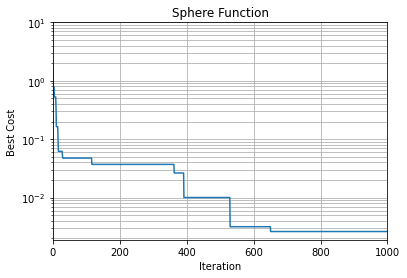

In [10]:
## Results ##

import matplotlib.pyplot as plot

Y = BestCost
X = []
for i in range(len(Y)):
    X.append(i)

# Display grid

plot.grid(True, which="both")
# Linear X axis, Logarithmic Y axis

plot.semilogy(X, Y)
plot.ylim([0, 10])
plot.xlim([0, X.__len__()])
# Provide the title for the semilog plot
plot.title('Sphere Function')
plot.xlabel('Iteration')
plot.ylabel('Best Cost')
plot.show()
